plan of what we are about to do <br>
we have a lot of missing values and categorical features. So we want to deal somehow with missing values and transform categorical values <br>
as I get from kaggle notebooks we have 2 options to deal with missing values. First - just drop columns with more that 30% missing values and fill-na most frequent or mean or median in others (fasters way), or deal with each column with missing values in individual maner. We will try both of this methods. <br>
and for the categorical values we want to one hot encode them using pandas.get_dummies method <br>
to apply changes to all of our rows we need to combine data and perform our manipulations on combined df <br>
we also need to remember that we have two methods of dealing with missing values that will return different amount of columns

# Data Preparation

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# missing values handle - first aproach with dropping values
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


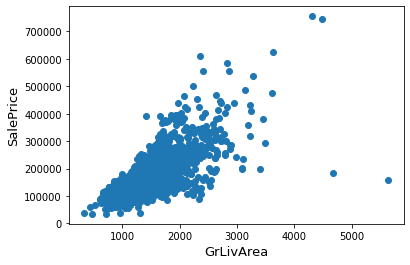

In [20]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [21]:
# we have two houses with really huge living area and they have relatively small sale price. We need to exclude them as they are clearly outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

In [22]:
df_train['SalePrice'] = np.log1p(df_train["SalePrice"])

In [23]:

combined_data = pd.concat([df_train.drop(columns='SalePrice'), df_test])
combined_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [24]:
# # set missing values threshold
# mis_prc_threshold = 10

# mis_data_df = combined_data.isnull().sum(axis=0).sort_values(ascending=False).reset_index()
# mis_data_df.columns = ['col_name', 'cnt_missing_vals']
# mis_data_df['mis_perc'] = mis_data_df['cnt_missing_vals'] / combined_data.shape[0]

# # columns to keep due to threshold
# cols_to_keep = list(mis_data_df[mis_data_df['mis_perc'] < (mis_prc_threshold/100)]['col_name'])

# mis_data_threshold_df = mis_data_df[mis_data_df['col_name'].isin(cols_to_keep)]

# # columns to keep due to threshold were we can still find missing values 
# cols_to_keep_with_missvals = mis_data_threshold_df[mis_data_threshold_df['mis_perc'] != 0]

In [25]:
# combined_data = combined_data[cols_to_keep].copy()

In [27]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_colnames = combined_data.select_dtypes(include=numerics).columns    

obj_colnames = [x for x in combined_data.columns if x not in num_colnames]

# from sklearn.impute import SimpleImputer

# obj_imputer = SimpleImputer(strategy='most_frequent')
# num_imputer = SimpleImputer(strategy='median')

# combined_data_num_imp = pd.DataFrame(num_imputer.fit_transform(combined_data[num_colnames]), columns=combined_data[num_colnames].columns)
# combined_data_obj_imp = pd.DataFrame(obj_imputer.fit_transform(combined_data[obj_colnames]), columns=combined_data[obj_colnames].columns)

# combined_data_dummies = pd.get_dummies(combined_data_obj_imp)

# combined_data = pd.concat([combined_data_num_imp, combined_data_dummies], axis=1)
# print('missing values in whole DF:', combined_data.isnull().sum().sum())

In [28]:
from scipy.stats import skew

In [30]:
# Check the skew of all numerical features
skewed_feats = combined_data[num_colnames].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    combined_data[feat] = boxcox1p(combined_data[feat], lam)

In [71]:
combined_data = combined_data.merge(df_train[['Id', 'SalePrice']], on='Id', how='left')

In [72]:
df_train_tranf = combined_data[combined_data['SalePrice'].notnull()].copy()
df_test_tranf = combined_data[combined_data['SalePrice'].isnull()].drop(columns='SalePrice').copy()

In [73]:
import xgboost
from sklearn.model_selection import train_test_split  
from sklearn import metrics
XGBReg = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [74]:
X = df_train_tranf[[x for x in df_train_tranf.columns if x != 'SalePrice']]
y = df_train_tranf['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [75]:
XGBReg = XGBReg.fit(X_train, y_train)
xgb_predictions = XGBReg.predict(X_test)
metrics.mean_squared_log_error(xgb_predictions, y_test)

9.99461732109208e-05

In [76]:
final_predictions = XGBReg.predict(df_test_tranf)
df_test['SalePrice'] = np.expm1(final_predictions)

In [77]:
df_test[['Id', 'SalePrice']].set_index('Id').to_csv('after_kaggle_#4.csv')